In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
df=pd.read_csv("yahoo_stock.csv")
df.head(50)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
5,2015-11-28,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
6,2015-11-29,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
7,2015-11-30,2093.810059,2080.409912,2090.949951,2080.409912,4.275030e+09,2080.409912
8,2015-12-01,2103.370117,2082.929932,2082.929932,2102.629883,3.712120e+09,2102.629883
9,2015-12-02,2104.270020,2077.110107,2101.709961,2079.510010,3.950640e+09,2079.510010


In [4]:
data=df['Close'].values.reshape(-1,1)
data

array([[2086.59008789],
       [2089.13989258],
       [2088.87011719],
       ...,
       [3567.79003906],
       [3581.87011719],
       [3557.54003906]])

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.14323386],
       [0.14465213],
       [0.14450208],
       ...,
       [0.96711598],
       [0.97494769],
       [0.96141466]])

In [6]:
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_size, :]
test_data = scaled_data[training_size:len(scaled_data), :]
train_data


array([[0.14323386],
       [0.14465213],
       [0.14450208],
       ...,
       [0.71814354],
       [0.71162459],
       [0.708888  ]])

In [7]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [10]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
22/22 [==============================] - 19s 410ms/step - loss: 0.0362 - val_loss: 0.0359
Epoch 2/100
22/22 [==============================] - 5s 224ms/step - loss: 0.0027 - val_loss: 0.0133
Epoch 3/100
22/22 [==============================] - 5s 224ms/step - loss: 0.0010 - val_loss: 0.0062
Epoch 4/100
22/22 [==============================] - 5s 233ms/step - loss: 5.2815e-04 - val_loss: 0.0043
Epoch 5/100
22/22 [==============================] - 5s 234ms/step - loss: 4.5548e-04 - val_loss: 0.0042
Epoch 6/100
22/22 [==============================] - 5s 242ms/step - loss: 4.4491e-04 - val_loss: 0.0042
Epoch 7/100
22/22 [==============================] - 6s 252ms/step - loss: 4.3174e-04 - val_loss: 0.0042
Epoch 8/100
22/22 [==============================] - 5s 233ms/step - loss: 4.3183e-04 - val_loss: 0.0040
Epoch 9/100
22/22 [==============================] - 5s 227ms/step - loss: 4.4714e-04 - val_loss: 0.0039
Epoch 10/100
22/22 [==============================] - 5s 225ms/ste

22/22 [==============================] - 5s 224ms/step - loss: 1.6782e-04 - val_loss: 0.0014
Epoch 79/100
22/22 [==============================] - 4s 200ms/step - loss: 1.6854e-04 - val_loss: 0.0016
Epoch 80/100
22/22 [==============================] - 5s 216ms/step - loss: 1.7159e-04 - val_loss: 0.0014
Epoch 81/100
22/22 [==============================] - 5s 219ms/step - loss: 1.9221e-04 - val_loss: 0.0019
Epoch 82/100
22/22 [==============================] - 5s 225ms/step - loss: 1.9419e-04 - val_loss: 0.0013
Epoch 83/100
22/22 [==============================] - 5s 215ms/step - loss: 1.6038e-04 - val_loss: 0.0015
Epoch 84/100
22/22 [==============================] - 5s 205ms/step - loss: 1.7082e-04 - val_loss: 0.0013
Epoch 85/100
22/22 [==============================] - 3s 152ms/step - loss: 1.6036e-04 - val_loss: 0.0015
Epoch 86/100
22/22 [==============================] - 1s 62ms/step - loss: 1.6794e-04 - val_loss: 0.0014
Epoch 87/100
22/22 [==============================] - 4s 210

In [11]:
# Predict the stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 44ms/step


In [12]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [13]:
# Plotting the predictions
look_back = time_step
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [14]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(data) - 1, :] = test_predict

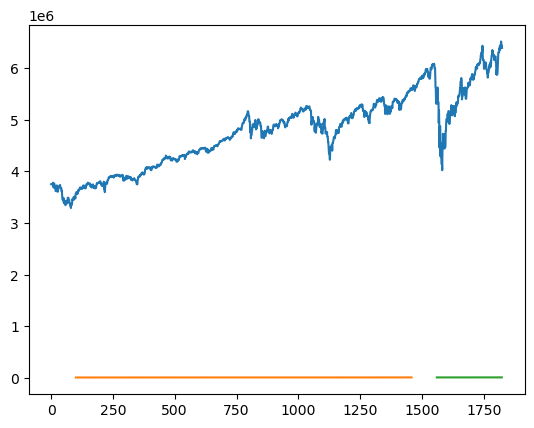

In [15]:
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()